In [7]:
import numpy as np
def rdnumpy(txtname):
    f = open(txtname)
    line = f.readlines()
    lines = len(line)  # row number
    for l in line:
        le = l.strip('\n').split(',')
        columns = len(le)-1  # col
        #print(le)
        #print(columns)
 
    A = np.zeros((lines, columns+1), dtype=np.single)
    print("read lines:",lines)
    print("read columns:",columns+1)
    A_row = 0
    for lin in line:
        #print(A_row)
        list = lin.strip('\n').split(',')
        A[A_row:] = list[0:columns+1]
        A_row += 1
    return A

In [8]:
#### Train &Test: 3360+1440

# Model

In [9]:
import numpy as np
import torch
from torch.utils.data import Dataset,DataLoader
from torchvision.transforms import ToTensor, ToPILImage, Lambda
import matplotlib.pyplot as plt
import os
import pandas as pd
from PIL import Image
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [10]:
n_epochs = 3
batch_size_train = 6 #32,或者16-由於數據集比較小
batch_size_test = 1440*3
learning_rate = 0.001 #0.0001
momentum = 0.5
log_interval = 10
random_seed = 1
torch.manual_seed(random_seed)

# test

In [11]:
#TrainDataf1=torch.as_tensor(rdnumpy("D:\FYP-HPC\Data_Python\GCN_PAPER_DiffRat_6F_1s\Rat19\MTrainGf1.txt"))
#TrainDataw0=torch.as_tensor(rdnumpy("D:\FYP-HPC\Data_Python\GCN_PAPER_DiffRat_6F_1s\Rat19\MTrainGw0.txt"))
#TrainDatam3=torch.as_tensor(rdnumpy("D:\FYP-HPC\Data_Python\GCN_PAPER_DiffRat_6F_1s\Rat19\MTrainGm3.txt"))

In [12]:
i=1        
startRow=i*8;
enRow=(i+1)*8;
#TrainDataf1[startRow:enRow,1:9]


In [13]:
class ScottTrainDataset(Dataset):
    def __init__(self, transform=None, target_transform=None):
        TrainDataf1=torch.as_tensor(rdnumpy("D:\FYP-HPC\Data_Python\GCN_PAPER_DiffRat_6F_1s\Rat22\MTrainGf1.txt"))
        TrainDataw0=torch.as_tensor(rdnumpy("D:\FYP-HPC\Data_Python\GCN_PAPER_DiffRat_6F_1s\Rat22\MTrainGw0.txt"))
        TrainDatam3=torch.as_tensor(rdnumpy("D:\FYP-HPC\Data_Python\GCN_PAPER_DiffRat_6F_1s\Rat22\MTrainGm3.txt"))
        #TrainDataq4=torch.as_tensor(rdnumpy("D:\FYP-HPC\Data_Python\GCN_PAPER_DiffRat_6F_1s\Rat16\MTrainGq4.txt"))
        
        self.AllTrainData=torch.cat((TrainDataw0,TrainDataf1,TrainDatam3),0)
        # 定义transform
        self.transform = transform
        self.target_transform = target_transform
 
    def __len__(self):
        '''返回数据集中的样本数'''
        return 420*3
 
    def __getitem__(self, index):#需要第index個的數據
        '''获取数据的方法，会和Dataloader连用'''
        i=index;        
        startRow=i*8;
        enRow=(i+1)*8;
        nowData=self.AllTrainData[startRow:enRow,2:7]
        
        if index>=0 and index<420:
            nowLabel=1
        elif index>=420 and index<420*2:
            nowLabel=0
        elif index>=420*2 and index<420*3:
            nowLabel=2
            
        if self.transform:
            nowData = self.transform(nowData)
        if self.target_transform:
            nowLabel = self.target_transform(nowLabel)
        '''
        if nowLabel==0:
            nowLabel = torch.FloatTensor([1, 0])
        else:
            nowLabel = torch.FloatTensor([0, 1])
        '''
        return nowData, nowLabel#需要返回數據和標簽

In [14]:
class ScottTestDataset(Dataset):
    def __init__(self, transform=None, target_transform=None):
        TestDataf1=torch.as_tensor(rdnumpy("D:\FYP-HPC\Data_Python\GCN_PAPER_DiffRat_6F_1s\Rat22\MTestGf1.txt"))
        TestDataw0=torch.as_tensor(rdnumpy("D:\FYP-HPC\Data_Python\GCN_PAPER_DiffRat_6F_1s\Rat22\MTestGw0.txt"))
        TestDatam3=torch.as_tensor(rdnumpy("D:\FYP-HPC\Data_Python\GCN_PAPER_DiffRat_6F_1s\Rat22\MTestGm3.txt"))
        #TestDataq4=torch.as_tensor(rdnumpy("D:\FYP-HPC\Data_Python\GCN_PAPER_DiffRat_6F_1s\Rat16\MTestGq4.txt"))
        
        self.AllTrainData=torch.cat((TestDataw0,TestDataf1,TestDatam3),0)
        # 定义transform
        self.transform = transform
        self.target_transform = target_transform
 
    def __len__(self):
        '''返回数据集中的样本数'''
        return 180*3
 
    def __getitem__(self, index):#需要第index個的數據
        '''获取数据的方法，会和Dataloader连用'''
        i=index;        
        startRow=i*8;
        enRow=(i+1)*8;
        nowData=self.AllTrainData[startRow:enRow,2:7]
        
        if index>=0 and index<180:
            nowLabel=1
        elif index>=180 and index<180*2:
            nowLabel=0
        elif index>=180*2 and index<180*3:
            nowLabel=2
            
        if self.transform:
            nowData = self.transform(nowData)
        if self.target_transform:
            nowLabel = self.target_transform(nowLabel)
            
        '''
        if nowLabel==0:
            nowLabel = torch.FloatTensor([1, 0])
        else:
            nowLabel = torch.FloatTensor([0, 1])
        '''
            
        return nowData, nowLabel#需要返回數據和標簽

In [15]:
train_loader = torch.utils.data.DataLoader(ScottTrainDataset(),
    batch_size=batch_size_train, shuffle=True)


test_loader = torch.utils.data.DataLoader(ScottTestDataset(),
    batch_size=batch_size_test, shuffle=True)

read lines: 3360
read columns: 9
read lines: 3360
read columns: 9
read lines: 3360
read columns: 9
read lines: 1440
read columns: 9
read lines: 1440
read columns: 9
read lines: 1440
read columns: 9


# Network

In [16]:
#https://zhuanlan.zhihu.com/p/199624393
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=2, padding=1)
        self.conv2 = nn.Conv2d(10,20, kernel_size=3, padding=1)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(40, 15)
        self.fc2 = nn.Linear(15, 3)
    def forward(self, x):
        ##print(x)##
        #print("begin")
        #print(x.shape)
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        #print("relu1:")
        #print(x.shape)
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        #print("relu2:")
        #print(x.shape)
        x = x.view(-1,40)
        #print("view:")
        #print(x.shape)
        x = F.relu(self.fc1(x))
        #print("relu3:")
        #print(x.shape)
        x = F.dropout(x, training=self.training) 
        #print("dropout")
        #print(x.shape)
        x = self.fc2(x)
        #print("fc2")
        #print(x.shape)
        return F.log_softmax(x, dim=-1)
network = Net()
optimizer = optim.Adam(network.parameters(), lr=learning_rate)

In [17]:
network = Net()
optimizer = optim.Adam(network.parameters(), lr=learning_rate)

# Train

In [18]:
#for batch_idx, (data, target) in enumerate(train_loader):
        #print(data.shape)
        #print(data)

In [19]:
train_losses = []
train_counter = []

def train(epoch):
  for _ in range(epoch):
      network.train()
      for batch_idx, (data, target) in enumerate(train_loader):
        #if batch_idx>1920 and batch_idx<1920+320: continue
        optimizer.zero_grad()
        data = data.unsqueeze(1)
        #print(data.shape)
        #print(data)
        output = network(data)
        #print(target.shape, target, output)
        #assert 1==0
        #loss = F.binary_cross_entropy_with_logits(output, target)
        ##
        #print("output:")
        #print(output)
        #print("target:")
        #print(target)
        #print(target.shape)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()

        '''
        print(torch.isnan(data).sum(), (target==1).sum()+(target==0).sum())
        assert (target==1).sum()+(target==0).sum()==16
        print(torch.isnan(data).sum(), target.shape, target, output)
        if torch.isnan(output).sum()!=0:
            print(data, target, torch.isnan(data).sum())
            print(data[-5])
        assert torch.isnan(output).sum()==0
        assert torch.isnan(loss).sum()==0
        '''
        if batch_idx % log_interval == 0:
          #print(torch.isnan(data).sum(), target.shape, target, output)
          print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
            _ , batch_idx * len(data), len(train_loader.dataset),
            100. * batch_idx / len(train_loader), loss.item()))
          train_losses.append(loss.item())
          train_counter.append(
            (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
          torch.save(network.state_dict(), './model.pth')
          torch.save(optimizer.state_dict(), './optimizer.pth')
          #print(network.state_dict())
    
train(50)

Train Epoch: 0 [0/1260 (0%)]	Loss: 1.118016
Train Epoch: 0 [60/1260 (5%)]	Loss: 1.140672
Train Epoch: 0 [120/1260 (10%)]	Loss: 1.081550
Train Epoch: 0 [180/1260 (14%)]	Loss: 1.078253
Train Epoch: 0 [240/1260 (19%)]	Loss: 1.023873
Train Epoch: 0 [300/1260 (24%)]	Loss: 1.067310
Train Epoch: 0 [360/1260 (29%)]	Loss: 1.097578
Train Epoch: 0 [420/1260 (33%)]	Loss: 1.093548
Train Epoch: 0 [480/1260 (38%)]	Loss: 1.109566
Train Epoch: 0 [540/1260 (43%)]	Loss: 1.109648
Train Epoch: 0 [600/1260 (48%)]	Loss: 0.962127
Train Epoch: 0 [660/1260 (52%)]	Loss: 0.836596
Train Epoch: 0 [720/1260 (57%)]	Loss: 1.022478
Train Epoch: 0 [780/1260 (62%)]	Loss: 0.865518
Train Epoch: 0 [840/1260 (67%)]	Loss: 0.934099
Train Epoch: 0 [900/1260 (71%)]	Loss: 0.731973
Train Epoch: 0 [960/1260 (76%)]	Loss: 0.944526
Train Epoch: 0 [1020/1260 (81%)]	Loss: 0.711026
Train Epoch: 0 [1080/1260 (86%)]	Loss: 0.517168
Train Epoch: 0 [1140/1260 (90%)]	Loss: 0.713664
Train Epoch: 0 [1200/1260 (95%)]	Loss: 0.751759
Train Epoch: 1

Train Epoch: 8 [480/1260 (38%)]	Loss: 0.268560
Train Epoch: 8 [540/1260 (43%)]	Loss: 0.103866
Train Epoch: 8 [600/1260 (48%)]	Loss: 1.685391
Train Epoch: 8 [660/1260 (52%)]	Loss: 0.290385
Train Epoch: 8 [720/1260 (57%)]	Loss: 0.200526
Train Epoch: 8 [780/1260 (62%)]	Loss: 0.105559
Train Epoch: 8 [840/1260 (67%)]	Loss: 0.227907
Train Epoch: 8 [900/1260 (71%)]	Loss: 0.272297
Train Epoch: 8 [960/1260 (76%)]	Loss: 0.235850
Train Epoch: 8 [1020/1260 (81%)]	Loss: 0.326220
Train Epoch: 8 [1080/1260 (86%)]	Loss: 0.102918
Train Epoch: 8 [1140/1260 (90%)]	Loss: 0.015072
Train Epoch: 8 [1200/1260 (95%)]	Loss: 0.152074
Train Epoch: 9 [0/1260 (0%)]	Loss: 0.123809
Train Epoch: 9 [60/1260 (5%)]	Loss: 2.209117
Train Epoch: 9 [120/1260 (10%)]	Loss: 0.096919
Train Epoch: 9 [180/1260 (14%)]	Loss: 0.200326
Train Epoch: 9 [240/1260 (19%)]	Loss: 0.223820
Train Epoch: 9 [300/1260 (24%)]	Loss: 0.077601
Train Epoch: 9 [360/1260 (29%)]	Loss: 0.043894
Train Epoch: 9 [420/1260 (33%)]	Loss: 0.068329
Train Epoch: 9

Train Epoch: 16 [1080/1260 (86%)]	Loss: 0.011559
Train Epoch: 16 [1140/1260 (90%)]	Loss: 0.076177
Train Epoch: 16 [1200/1260 (95%)]	Loss: 0.004603
Train Epoch: 17 [0/1260 (0%)]	Loss: 0.111362
Train Epoch: 17 [60/1260 (5%)]	Loss: 0.122752
Train Epoch: 17 [120/1260 (10%)]	Loss: 0.121571
Train Epoch: 17 [180/1260 (14%)]	Loss: 1.175974
Train Epoch: 17 [240/1260 (19%)]	Loss: 0.078851
Train Epoch: 17 [300/1260 (24%)]	Loss: 0.131993
Train Epoch: 17 [360/1260 (29%)]	Loss: 0.216709
Train Epoch: 17 [420/1260 (33%)]	Loss: 0.044811
Train Epoch: 17 [480/1260 (38%)]	Loss: 0.119508
Train Epoch: 17 [540/1260 (43%)]	Loss: 0.136999
Train Epoch: 17 [600/1260 (48%)]	Loss: 0.086860
Train Epoch: 17 [660/1260 (52%)]	Loss: 0.094371
Train Epoch: 17 [720/1260 (57%)]	Loss: 0.004560
Train Epoch: 17 [780/1260 (62%)]	Loss: 0.080709
Train Epoch: 17 [840/1260 (67%)]	Loss: 0.076824
Train Epoch: 17 [900/1260 (71%)]	Loss: 0.018690
Train Epoch: 17 [960/1260 (76%)]	Loss: 0.152591
Train Epoch: 17 [1020/1260 (81%)]	Loss: 0.

Train Epoch: 25 [360/1260 (29%)]	Loss: 0.137506
Train Epoch: 25 [420/1260 (33%)]	Loss: 0.211272
Train Epoch: 25 [480/1260 (38%)]	Loss: 0.022113
Train Epoch: 25 [540/1260 (43%)]	Loss: 0.067774
Train Epoch: 25 [600/1260 (48%)]	Loss: 0.306066
Train Epoch: 25 [660/1260 (52%)]	Loss: 0.426869
Train Epoch: 25 [720/1260 (57%)]	Loss: 0.296881
Train Epoch: 25 [780/1260 (62%)]	Loss: 0.049976
Train Epoch: 25 [840/1260 (67%)]	Loss: 0.092628
Train Epoch: 25 [900/1260 (71%)]	Loss: 0.088757
Train Epoch: 25 [960/1260 (76%)]	Loss: 0.106358
Train Epoch: 25 [1020/1260 (81%)]	Loss: 0.241813
Train Epoch: 25 [1080/1260 (86%)]	Loss: 0.071339
Train Epoch: 25 [1140/1260 (90%)]	Loss: 0.234367
Train Epoch: 25 [1200/1260 (95%)]	Loss: 0.446932
Train Epoch: 26 [0/1260 (0%)]	Loss: 0.725599
Train Epoch: 26 [60/1260 (5%)]	Loss: 0.379236
Train Epoch: 26 [120/1260 (10%)]	Loss: 0.077075
Train Epoch: 26 [180/1260 (14%)]	Loss: 0.014967
Train Epoch: 26 [240/1260 (19%)]	Loss: 0.093470
Train Epoch: 26 [300/1260 (24%)]	Loss: 0.

Train Epoch: 33 [960/1260 (76%)]	Loss: 0.099641
Train Epoch: 33 [1020/1260 (81%)]	Loss: 0.013499
Train Epoch: 33 [1080/1260 (86%)]	Loss: 0.425292
Train Epoch: 33 [1140/1260 (90%)]	Loss: 0.004351
Train Epoch: 33 [1200/1260 (95%)]	Loss: 0.120286
Train Epoch: 34 [0/1260 (0%)]	Loss: 0.018164
Train Epoch: 34 [60/1260 (5%)]	Loss: 0.211960
Train Epoch: 34 [120/1260 (10%)]	Loss: 0.039509
Train Epoch: 34 [180/1260 (14%)]	Loss: 0.248193
Train Epoch: 34 [240/1260 (19%)]	Loss: 0.035997
Train Epoch: 34 [300/1260 (24%)]	Loss: 0.201583
Train Epoch: 34 [360/1260 (29%)]	Loss: 0.085670
Train Epoch: 34 [420/1260 (33%)]	Loss: 0.600566
Train Epoch: 34 [480/1260 (38%)]	Loss: 0.002013
Train Epoch: 34 [540/1260 (43%)]	Loss: 0.044077
Train Epoch: 34 [600/1260 (48%)]	Loss: 2.268552
Train Epoch: 34 [660/1260 (52%)]	Loss: 0.342520
Train Epoch: 34 [720/1260 (57%)]	Loss: 0.086821
Train Epoch: 34 [780/1260 (62%)]	Loss: 0.055416
Train Epoch: 34 [840/1260 (67%)]	Loss: 0.339842
Train Epoch: 34 [900/1260 (71%)]	Loss: 0.

Train Epoch: 42 [60/1260 (5%)]	Loss: 0.036533
Train Epoch: 42 [120/1260 (10%)]	Loss: 0.043724
Train Epoch: 42 [180/1260 (14%)]	Loss: 0.127678
Train Epoch: 42 [240/1260 (19%)]	Loss: 0.001905
Train Epoch: 42 [300/1260 (24%)]	Loss: 0.212699
Train Epoch: 42 [360/1260 (29%)]	Loss: 0.036970
Train Epoch: 42 [420/1260 (33%)]	Loss: 0.128772
Train Epoch: 42 [480/1260 (38%)]	Loss: 0.230071
Train Epoch: 42 [540/1260 (43%)]	Loss: 0.000245
Train Epoch: 42 [600/1260 (48%)]	Loss: 0.003905
Train Epoch: 42 [660/1260 (52%)]	Loss: 0.119903
Train Epoch: 42 [720/1260 (57%)]	Loss: 0.005550
Train Epoch: 42 [780/1260 (62%)]	Loss: 1.854335
Train Epoch: 42 [840/1260 (67%)]	Loss: 0.487019
Train Epoch: 42 [900/1260 (71%)]	Loss: 0.025900
Train Epoch: 42 [960/1260 (76%)]	Loss: 0.214018
Train Epoch: 42 [1020/1260 (81%)]	Loss: 0.015935
Train Epoch: 42 [1080/1260 (86%)]	Loss: 0.715512
Train Epoch: 42 [1140/1260 (90%)]	Loss: 0.032182
Train Epoch: 42 [1200/1260 (95%)]	Loss: 0.105317
Train Epoch: 43 [0/1260 (0%)]	Loss: 0.

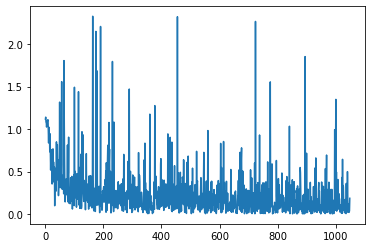

In [20]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import matplotlib.pyplot as plt

plt.plot(list(range(len(train_losses))), train_losses)
plt.show()

In [21]:
'''
for p in network.parameters():
    print(p)
    break
tmp = torch.load('./model.pth')
network.load_state_dict(tmp)
for p in network.parameters():
    print(p)
    break
'''

"\nfor p in network.parameters():\n    print(p)\n    break\ntmp = torch.load('./model.pth')\nnetwork.load_state_dict(tmp)\nfor p in network.parameters():\n    print(p)\n    break\n"

In [22]:
import scipy.io as io
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]
def test():
  network.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      data = data.unsqueeze(1)
      #print("data:")
      #print(data.shape)
      output = network(data)
      #print("output:")
      #print(output.shape)
      
      test_loss += F.nll_loss(output, target, size_average=False).item()
      #print(output)
      pred = output.data.max(1, keepdim=True)[1]
      #print(pred)###
      result1 = np.array(pred)
      np.savetxt('pred.txt',result1)
      result2 = np.array(target)
      np.savetxt('target.txt',result2)
      
      #Save done
      correct += pred.eq(target.data.view_as(pred)).sum()
      
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))
    
test()


Test set: Avg. loss: 0.0372, Accuracy: 536/540 (99.26%)



C:\Users\PCI\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


In [23]:
'''
import scipy.io as io
result1 = np.array(result1)
np.savetxt('npresult1.txt',result1)
'''

"\nimport scipy.io as io\nresult1 = np.array(result1)\nnp.savetxt('npresult1.txt',result1)\n"

In [24]:
'''
for epoch in range(1, n_epochs + 1):
  train(epoch)
  test()
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')
plt.show()
'''

"\nfor epoch in range(1, n_epochs + 1):\n  train(epoch)\n  test()\nimport matplotlib.pyplot as plt\nfig = plt.figure()\nplt.plot(train_counter, train_losses, color='blue')\nplt.scatter(test_counter, test_losses, color='red')\nplt.legend(['Train Loss', 'Test Loss'], loc='upper right')\nplt.xlabel('number of training examples seen')\nplt.ylabel('negative log likelihood loss')\nplt.show()\n"

# confusion matrix

In [25]:
  import scipy.io as io
  test_losses = []
  test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]
  network.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      data = data.unsqueeze(1)
      #print("data:")
      #print(data.shape)
      output = network(data)
      #print("output:")
      #print(output.shape)
      
      test_loss += F.nll_loss(output, target, size_average=False).item()
      #print(output)
      pred = output.data.max(1, keepdim=True)[1]
      #print(pred)###
      result1 = np.array(pred)
      #np.savetxt('pred.txt',result1)
      result2 = np.array(target)
      #np.savetxt('target.txt',result2)
      
      #Save done
      correct += pred.eq(target.data.view_as(pred)).sum()
      
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))


Test set: Avg. loss: 0.0372, Accuracy: 536/540 (99%)



In [26]:
from sklearn.metrics import f1_score
 
y_true = target
y_pred = pred
 
print(f1_score(y_true, y_pred, average='weighted'))# unbalance F1
print(f1_score(y_true, y_pred, average='macro'))
print()
print(f1_score(y_true, y_pred, average=None))
print("Acute       Normal      Chronic")

0.9925764996771366
0.9925764996771367

[0.99173554 0.99722992 0.98876404]
Acute       Normal      Chronic


[[100.     0.     0.  ]
 [  0.   100.     0.  ]
 [  1.67   0.56  97.78]]


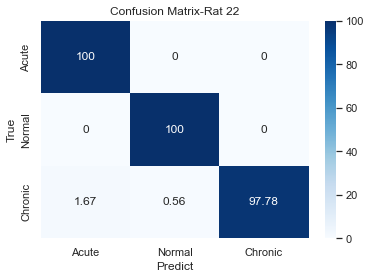

In [27]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

sns.set()
f,ax = plt.subplots()
y_true =(target)
y_pred = (pred)
C2 = confusion_matrix(y_true,y_pred,labels=[0,1,2])

fm=C2.sum(axis=1)
C3=C2/fm*100
C3=np.around(C3,decimals=2)

print(C3)
a=sns.heatmap(C3,annot=True,ax=ax, cmap = 'Blues', fmt='g') #画热力图  , cbar = None

ax.set_title('Confusion Matrix-Rat 22') #标题
ax.set_xlabel('Predict') #x 轴
ax.set_ylabel('True') #y 轴


#Normal, Acute, Chronic, Pre-seizure
a.set_xticklabels(['Acute','Normal','Chronic'])
a.set_yticklabels(['Acute','Normal','Chronic'])


fig = a.get_figure()
fig.savefig("6F_3C.png", dpi=1080)